In [297]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

Title of Project: Did Steve Nash really deserve his MVPs?

Hypotehsis: Steve Nash's assists, pts and minutes are correlated to the Suns winninggames. Thus can we use these variables to retroactively predict the Suns' post season and how accurate is it?

Link: https://www.landofbasketball.com/nba_players_game_logs/2005/steve_nash.htm

I actually know how to extract data from html better this time thus I can now get and access better data, but also getting table from raw html means a lot of the data will be bad or misformatted

In [298]:
def WL(x):
    if x.__contains__('W'):
        return 1
    else:
        return 0

In [299]:
#cleaning and prepping data into reg and post season, for this one I might have manually added a win loss colum (ie went to csv n did the seperation by hand)

data = pd.read_csv("nash_05.csv", index_col=False)
data['WL']=data['WL'].map(lambda x: WL(x))
data.drop(['Unnamed: 18'],axis=1, inplace=True)
pts_ = data['Score'].copy()
for i in range(pts_.size):
    if pts_[i].__contains__("OT"):
        pts_[i]=pts_[i].replace("OT", '')
    pts_[i] = pts_[i].split("-")
    pts_[i] = int(pts_[i][0])-int(pts_[i][1])

pts = pd.Series(pts_)
data['pts_dif'] = pts
reg = data.iloc[:76]
post = data.iloc[76:]
reg

/tmp/ipykernel_36650/3619825961.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv("nash_05.csv", index_col=False)


,Gm,Date,Opponent,WL,Score,Min,Pts,ORb,DRb,Reb,Ast,Stl,Blk,TO,PF,FGM/A,3PM/A,FTM/A,pts_dif
0,1,Nov. 03,vs. Hawks,1,112 - 82,24,12,0,3,3,4,2,0,3,2,6,-,12,30
1,2,Nov. 05,@ 76ers,1,108 - 98,32,9,0,4,4,10,0,0,4,5,3,-,5,10
2,3,Nov. 06,@ Nets,1,112 - 80,37,17,1,1,2,8,3,0,6,0,6,-,8,32
3,4,Nov. 09,@ Bulls,1,94 - 74,33,8,0,3,3,12,0,0,1,3,3,-,9,20
4,5,Nov. 10,@ Cavaliers,0,109 - 114OT,50,15,1,6,7,17,0,0,1,5,5,-,13,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,Apr. 12,vs. Hornets,1,99 - 85,35,6,2,1,3,13,1,0,2,1,3,-,11,14
72,73,Apr. 15,vs. Clippers,1,98 - 91,41,14,2,1,3,11,1,0,4,2,6,-,17,7
73,74,Apr. 16,vs. Kings,1,116 - 98,26,4,0,6,6,11,0,0,3,2,2,-,3,18
74,75,Apr. 18,vs. Nuggets,1,128 - 114,26,8,0,0,0,13,2,0,4,1,2,-,2,14


Does his passing and assists and scoring actually contribute to the Suns' wins

0.06113685807808289

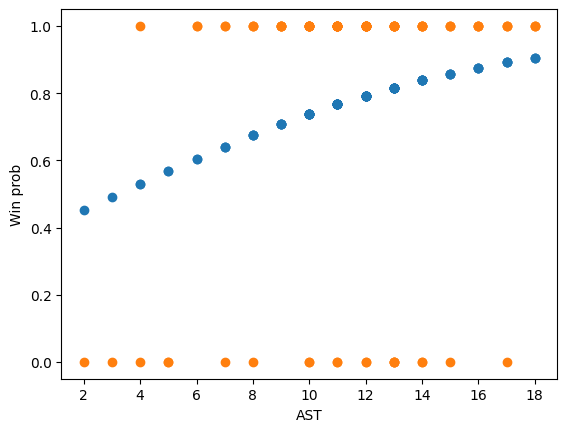

In [300]:
#do some logistic regression to show that Nash does contribute to winning, ie how his assist contributes to winning in 05

from sklearn.metrics import r2_score

X = np.array(data["Ast"]).reshape(-1,1)
y = data["WL"]



logr = linear_model.LogisticRegression()
logr.fit(X,y)

def prob_line(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = np.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

Y = prob_line(logr, X).flatten()
plt.plot(data["Ast"], Y, 'o')
plt.plot(data["Ast"], y, 'o')
plt.xlabel("AST")
plt.ylabel("Win prob")
r2_score(y, Y)

0.041884577244404864

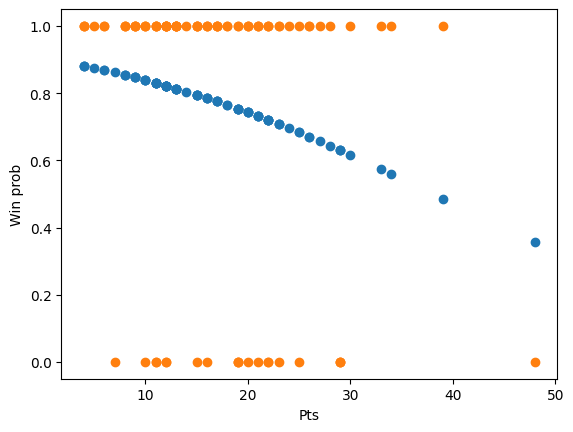

In [301]:
from sklearn.metrics import r2_score

X = np.array(data["Pts"]).reshape(-1,1)
y = data["WL"]



logr = linear_model.LogisticRegression()
logr.fit(X,y)

def prob_line(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = np.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

Y = prob_line(logr, X).flatten()
plt.plot(data["Pts"], Y, 'o')
plt.plot(data["Pts"], y, 'o')
plt.xlabel("Pts")
plt.ylabel("Win prob")
r2_score(y, Y)

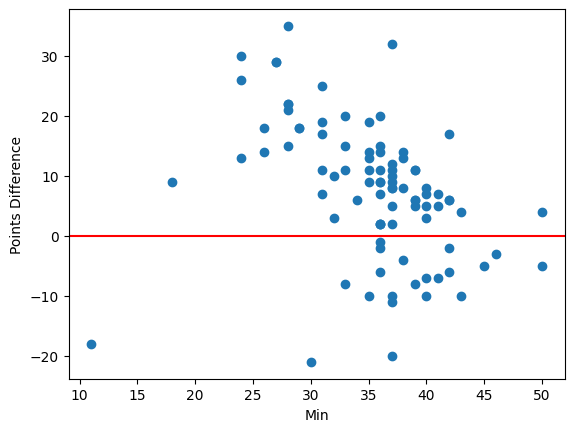

In [302]:
features=['Min', 'Pts', 'Ast']
plt.plot(data['Min'], data['pts_dif'], 'o')
plt.xlabel("Min")
plt.ylabel("Points Difference")
plt.axhline(y = 0, color = 'r', linestyle = '-') 

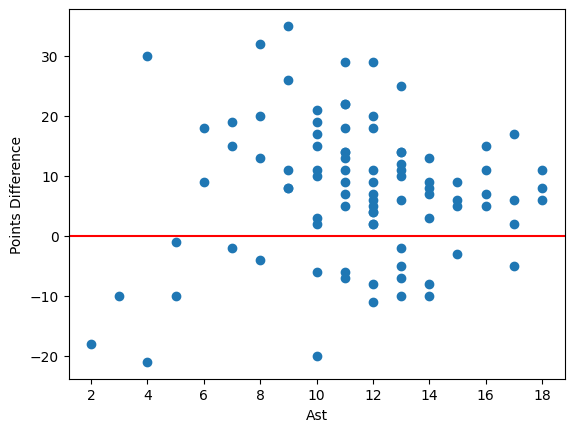

In [303]:
plt.plot(data['Ast'], data['pts_dif'], 'o')
plt.xlabel("Ast")
plt.ylabel("Points Difference")
plt.axhline(y = 0, color = 'r', linestyle = '-') 

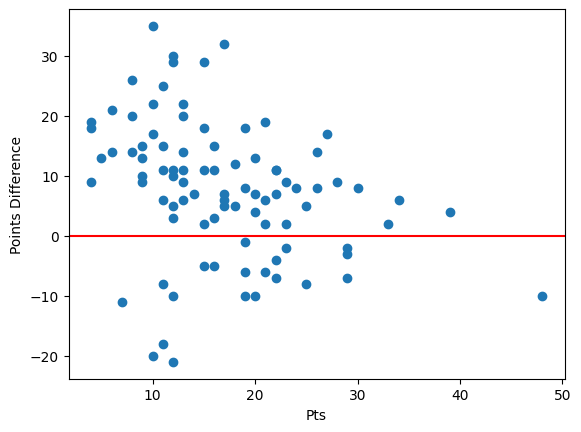

In [304]:
plt.plot(data['Pts'], data['pts_dif'], 'o')
plt.xlabel("Pts")
plt.ylabel("Points Difference")
plt.axhline(y = 0, color = 'r', linestyle = '-') 

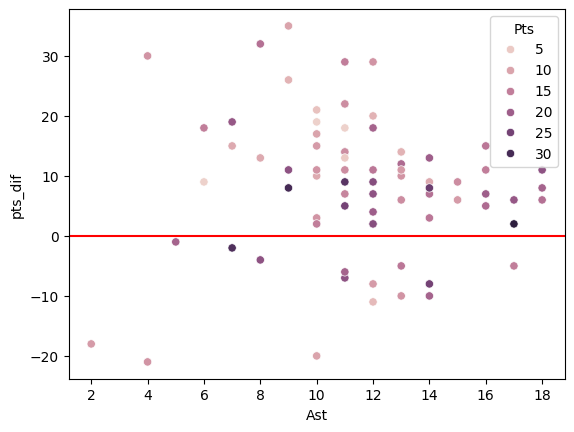

In [305]:
_ = sns.scatterplot(x='Ast', y='pts_dif', hue='Pts', data=reg)
plt.axhline(y = 0, color = 'r', linestyle = '-') 

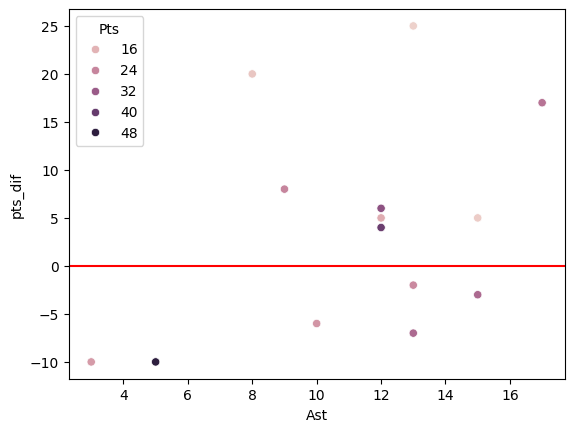

In [306]:
_ = sns.scatterplot(x='Ast', y='pts_dif', hue='Pts', data=post)
plt.axhline(y = 0, color = 'r', linestyle = '-') 

[Text(0.6, 0.9166666666666666, 'Min <= 44.0\ngini = 0.317\nsamples = 76\nvalue = [15.0, 61.0]'),
 Text(0.5, 0.75, 'Ast <= 5.5\ngini = 0.29\nsamples = 74\nvalue = [13, 61]'),
 Text(0.55, 0.8333333333333333, 'True  '),
 Text(0.3, 0.5833333333333334, 'Min <= 27.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.4166666666666667, 'Pts <= 11.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.5833333333333334, 'Min <= 32.5\ngini = 0.245\nsamples = 70\nvalue = [10, 60]'),
 Text(0.6, 0.4166666666666667, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.8, 0.4166666666666667, 'Ast <= 14.5\ngini = 0.32\nsamples = 50\nvalue = [10, 40]'),
 Text(0.7, 0.25, 'Pts <= 18.5\ngini = 0.381\nsamples = 39\nvalue = [10, 29]'),
 Text(0.6, 0.08333333333333333, 'gini = 0.298\nsamples = 22\nvalue 

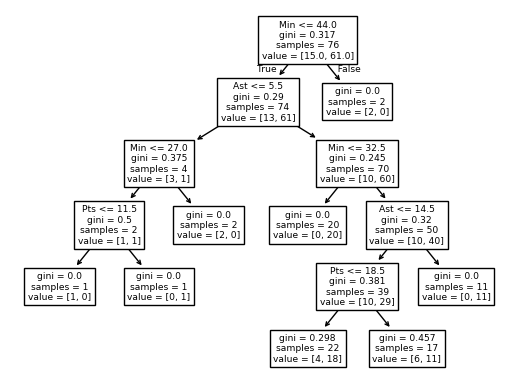

In [307]:
X = reg[features]
y = reg['WL']
dtree = DecisionTreeClassifier(max_depth=5)
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

model score: 0.782608695652174


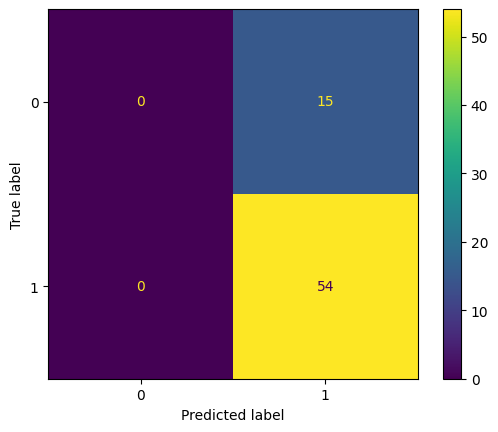

In [308]:
def test_train_opt_sp():
    score = {}
    mx = 0
    i = 0.1
    while i <= 0.9:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
        dt_model = DecisionTreeClassifier().fit(X_train, y_train)
        score[dt_model.score(X_test, y_test)] = i
        i+=0.1
    for k in score.keys():
        if k > mx:
            mx = k
    return score[mx], mx

t = test_train_opt_sp()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t[0], random_state=42)
dt_model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print("model score:", t[1])
cm = confusion_matrix(y_test, dt_model.predict(X_test))  #.ravel()
_ = ConfusionMatrixDisplay(cm).plot() #the score is no good

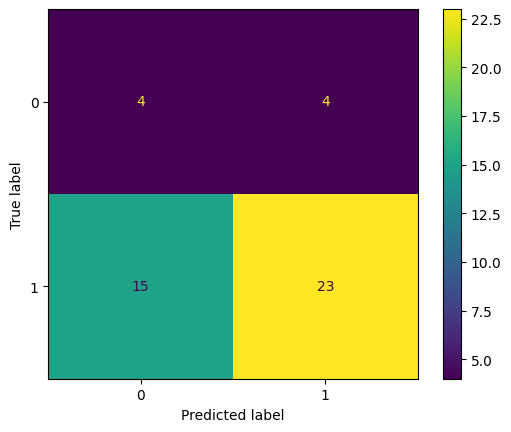

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
dt_model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
cm = confusion_matrix(y_test, dt_model.predict(X_test))  #.ravel()
_ = ConfusionMatrixDisplay(cm).plot()

In [310]:
true_res = post['WL']
def f1(true, pred):
    count = 0
    for i in range(len(true)):
        if pred[i] == 1 and pred[i] == true[i]:
            count+=1
    return (2*count)/(2*len(true))

In [311]:
pred = dt_model.predict(post[features])

accuracy_score(true_res, pred)

0.5714285714285714

Well the accuracy score is basically a toincoss which is no good, the data also predicted that Steve Nash will win all post season games, which did not happen. This is most likely due to the fact that he plays well in the post season just his team did not win. The best we can conclude from this is he played well and a lot (which is what teams ususally do) no matter what so bare mnimum is he is a great player, we just cannot predict wins and losses from one single player playing and not when that player plays well no matter what.

Looking at my regression part of this project ie how much did his teammates change in term of scoring when he played, which was based on my model kinda terrible ie they barely chnaged, but that has tiny sample size. Thus we will look at the 2006 season and using logistic regression and pca what metrics actually matters so here I decided to add more variables and doing pca so I do not need to guess the weight of each vector myself.
data from: https://www.statmuse.com/nba/player/steve-nash-2660/game-log?seasonYear=2005

In [312]:
df = pd.read_csv("Nash_06.csv", index_col=False)

#clean the data once more as I got it from a html table, as it is formatted different from above I had to get rid of certain patterns

def replace_pattern(file_name, pat, new_pat):
    myFile = open(file_name, "r")
    strData = myFile.read()
    listData = strData.split("\n")
    myFile.close()
    cleaned = []
    for line in listData:
        if pat in line:
            line = line.replace(pat, new_pat)
        cleaned.append(line+"\n")
    f = open(file_name, "w")
    for line in cleaned:
        f.write(line)
    f.close()

#replace_pattern("Nash_06.csv", "@,", "")
df

,DATE,TM,OPP,SCORE,MIN,PTS,REB,AST,STL,BLK,...,3P%,FTM,FTA,FT%,TS%,OREB,DREB,TOV,PF,+/-
0,Sat 6/3,PHX,DAL,L 93-102,42,19,6,9,1,0,...,50.0,4,4.0,100.0,64.4,0,6,3,2,-7.0
1,Thu 6/1,PHX,DAL,L 101-117,39,20,6,11,1,1,...,16.7,9,9.0,100.0,47.7,0,6,3,3,-9.0
2,Tue 5/30,PHX,DAL,W 106-86,33,21,0,7,0,1,...,100.0,4,4.0,100.0,71.1,0,0,2,1,14.0
3,Sun 5/28,PHX,DAL,L 88-95,37,21,1,7,0,1,...,42.9,0,0.0,58.3,0.0,1,4,1,0,-5.0
4,Fri 5/26,PHX,DAL,L 98-105,39,16,2,11,0,0,...,100.0,2,3.0,66.7,70.7,0,2,4,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Thu 11/10,PHX,DET,L 104-111,34,18,0,8,0,0,...,25.0,5,5.0,100.0,46.9,0,0,6,2,-3.0
95,Sun 11/6,PHX,SAC,L 117-118,31,18,1,13,0,0,...,66.7,2,2.0,100.0,69.9,0,1,4,5,-9.0
96,Sat 11/5,PHX,UTA,W 97-88,33,14,1,11,1,1,...,0.0,6,6.0,100.0,47.8,0,1,4,1,-8.0
97,Thu 11/3,PHX,LAL,W 122-112,35,12,6,17,4,0,...,25.0,7,7.0,100.0,49.7,0,6,4,3,-1.0


In [313]:
wl = []
score = []

for sc in df["SCORE"]:
    if "L" in sc:
        wl.append(0)
    elif "W" in sc:
        wl.append(1)
    sc = sc.replace("L ", '')
    sc = sc.replace("W ", '')
    score.append(sc)

df["SCORE"] = score
df["WL"] = pd.Series(wl)

0.007248439141438245

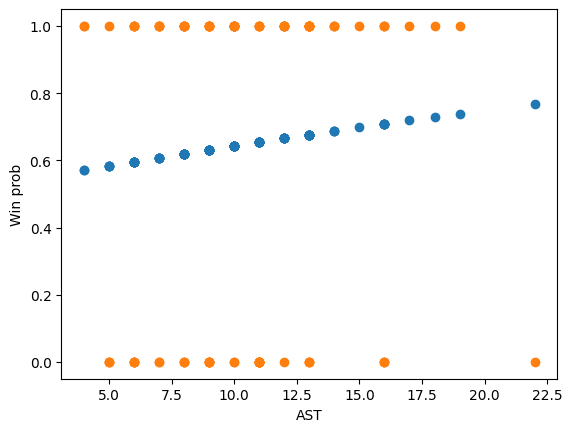

In [314]:

from sklearn.metrics import r2_score

X = np.array(df["AST"]).reshape(-1,1)
y = df["WL"]



logr = linear_model.LogisticRegression()
logr.fit(X,y)

def prob_line(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = np.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

Y = prob_line(logr, X).flatten()
plt.plot(df["AST"], Y, 'o')
plt.plot(df["AST"], y, 'o')
plt.xlabel("AST")
plt.ylabel("Win prob")
r2_score(y, Y)

0.0005744188010022855

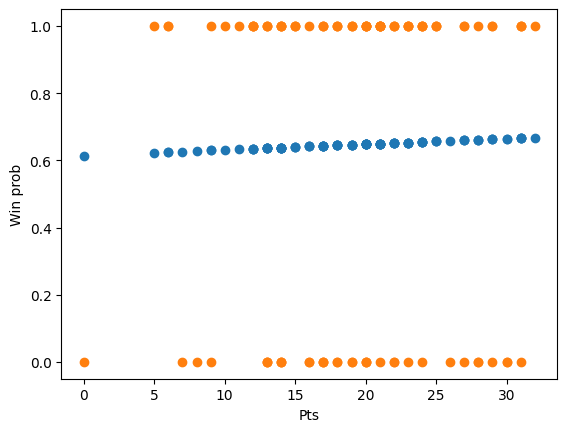

In [315]:
X = np.array(df["PTS"]).reshape(-1,1)
y = df["WL"]



logr = linear_model.LogisticRegression()
logr.fit(X,y)

def prob_line(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = np.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

Y = prob_line(logr, X).flatten()
plt.plot(df["PTS"], Y, 'o')
plt.plot(df["PTS"], y, 'o')
plt.xlabel("Pts")
plt.ylabel("Win prob")
r2_score(y, Y)

In [316]:
pts_ = df['SCORE'].copy()
for i in range(pts_.size):
    if pts_[i].__contains__("OT"):
        pts_[i]=pts_[i].replace("OT", '')
    pts_[i] = pts_[i].split("-")
    pts_[i] = int(pts_[i][0])-int(pts_[i][1])

pts = pd.Series(pts_)
df['pts_dif'] = pts
df

,DATE,TM,OPP,SCORE,MIN,PTS,REB,AST,STL,BLK,...,FTA,FT%,TS%,OREB,DREB,TOV,PF,+/-,WL,pts_dif
0,Sat 6/3,PHX,DAL,93-102,42,19,6,9,1,0,...,4.0,100.0,64.4,0,6,3,2,-7.0,0,-9
1,Thu 6/1,PHX,DAL,101-117,39,20,6,11,1,1,...,9.0,100.0,47.7,0,6,3,3,-9.0,0,-16
2,Tue 5/30,PHX,DAL,106-86,33,21,0,7,0,1,...,4.0,100.0,71.1,0,0,2,1,14.0,1,20
3,Sun 5/28,PHX,DAL,88-95,37,21,1,7,0,1,...,0.0,58.3,0.0,1,4,1,0,-5.0,0,-7
4,Fri 5/26,PHX,DAL,98-105,39,16,2,11,0,0,...,3.0,66.7,70.7,0,2,4,4,1.0,0,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Thu 11/10,PHX,DET,104-111,34,18,0,8,0,0,...,5.0,100.0,46.9,0,0,6,2,-3.0,0,-7
95,Sun 11/6,PHX,SAC,117-118,31,18,1,13,0,0,...,2.0,100.0,69.9,0,1,4,5,-9.0,0,-1
96,Sat 11/5,PHX,UTA,97-88,33,14,1,11,1,1,...,6.0,100.0,47.8,0,1,4,1,-8.0,1,9
97,Thu 11/3,PHX,LAL,122-112,35,12,6,17,4,0,...,7.0,100.0,49.7,0,6,4,3,-1.0,1,10


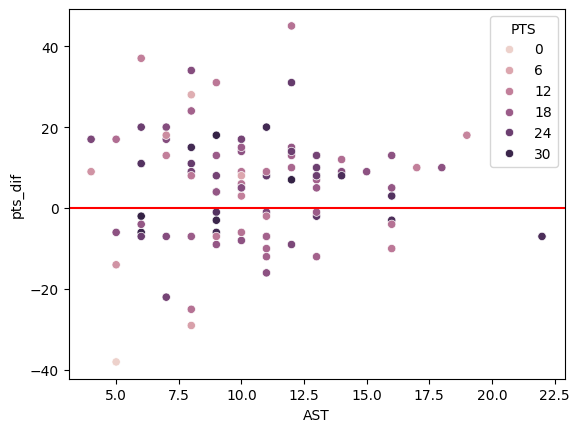

In [317]:
_ = sns.scatterplot(x='AST', y='pts_dif', hue='PTS', data=df)
plt.axhline(y = 0, color = 'r', linestyle = '-') 

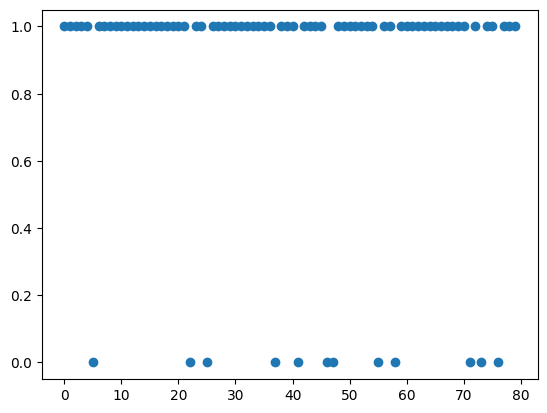

In [330]:
feat = ["PTS", "AST", "MIN", "PF", "TS%", "TOV"]
X = df[feat]
y = df["WL"]

#try using pca/normalising data and logregress

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 30)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = LogisticRegression(random_state = 30)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

plt.plot(y_pred, 'o')

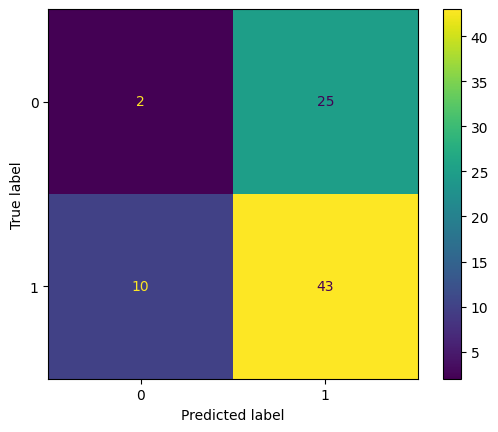

In [331]:

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

_ = ConfusionMatrixDisplay(cm).plot()

#log regression to test out pca not bad at all

In [332]:
from sklearn.metrics import classification_report
target_names = ["WL", "pts_dif"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          WL       0.17      0.07      0.10        27
     pts_dif       0.63      0.81      0.71        53

    accuracy                           0.56        80
   macro avg       0.40      0.44      0.41        80
weighted avg       0.48      0.56      0.51        80



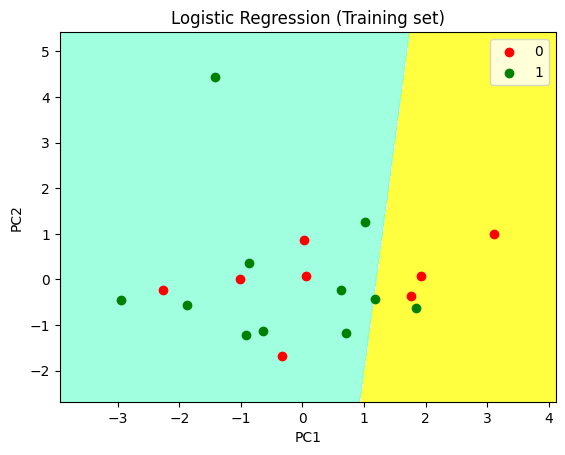

In [333]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

Ultimately our models do a much better job measuring based on points difference rather than wins cause wins can be extremely sensitive but sports is unpredictable so the models are no good. It does predict when theyll lose betetr tho as him playig badly means they are more likely to lose vs him playing well and theyll prolly win.